In [22]:
import json

from ipynb.fs.full.quantumsystem import qs, System, HyperSystem, IntegerSystem
from ipynb.fs.full.DamageSystem import Armor, UnitDamage
from ipynb.fs.full.MovementSystem import Move, MovementSpeed
from ipynb.fs.full.WeaponsSystem import Weapons
from ipynb.fs.full.FactionSystem import Faction

In [23]:
class Size(IntegerSystem):
    """ Size value """

class TMM(IntegerSystem):
    """ Total Movement Modifier """

class Special(System):
    edge_name = "special"

In [24]:
class MechType(System):
    edge_name = "mech_type"

class MechModel(System):
    edge_name = "mech_model"

class MechRole(System):
    edge_name = "mech_role"
    
class PointValue(System):
    edge_name = "point_value"

@PointValue.sd
@Special.sd
@TMM.sd
@Size.sd
@MechRole.sd
@MechModel.sd
@MechType.sd
class MechDefinition(HyperSystem):
    """ MechDefinition """

In [25]:
@Faction.sd
@UnitDamage.sd
@Weapons.sd
@Move.sd
class Unit(HyperSystem):
    """ Unit """

@MechDefinition.sd
@Unit.sd
class Mech(HyperSystem):
    @classmethod
    def buildMechFactory(cls, systemDefaults):
        def newMechFactory(mechName, faction):
            #systemDefaults[0][3] = faction
            return cls.build_system(mechName, terminants=systemDefaults)
        return newMechFactory

In [26]:
MechFactories = {
    "Kingfisher Prime": Mech.buildMechFactory({
        "Unit": {
            "Move": {  # Move System
                "Movement": [8, "j"],
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": [{"Modifier": "0", "Damage": "6"}],
                "MidRangeWeapons": [{"Modifier": "2", "Damage": "6"}],
                "LongRangeWeapons": [{"Modifier": "4", "Damage": "3"}],
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": ["9", 0, "7", 0],
                "CriticalHits": ["1", "4", "4", "4"]
            },
            "Faction": "Unaligned"
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Kingfisher Prime",
            "MechRole": "Brawler",
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["OMNI", "CASE", "IF01"]),
            "PointValue": "54"
        }
    }),
    "Atlas": Mech.buildMechFactory({
        "Unit": {
            "Move": {  # Move System
                "Movement": [6, ""],
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": [{"Modifier": "0", "Damage": "4"}],
                "MidRangeWeapons": [{"Modifier": "2", "Damage": "4"}],
                "LongRangeWeapons": [{"Modifier": "4", "Damage": "4"}],
                "Overheat": {"OverheatValue": "1", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": ["10", 0, "8", 0],
                "CriticalHits": ["1", "4", "4", "4"]
            },
            "Faction": "Unaligned"
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Atlas",
            "MechRole": "Juggernaut",
            "Size": "4",
            "TMM": "1",
            "Special": json.dumps(["AC2", "IF1", "LRM1", "REAR2"]),
            "PointValue": "52"
        }
    }),
    "Huntsman": Mech.buildMechFactory({
        "Unit": {
            "Move": {  # Move System
                "Movement": [10, "j"],
                "Elevation": "0",
                "XYLocation": [0, 0]
            },
            "Weapons": {  # Weapons System
                "ShortRangeWeapons": [{"Modifier": "0", "Damage": "3"}],
                "MidRangeWeapons": [{"Modifier": "2", "Damage": "3"}],
                "LongRangeWeapons": [{"Modifier": "4", "Damage": "2"}],
                "Overheat": {"OverheatValue": "3", "OverheatDamage": "3"}
            },
            "UnitDamage": {  # Unit Damage System
                "Armor": ["6", 0, "3", 0],
                "CriticalHits": ["1", "4", "4", "4"]
            },
            "Faction": "Unaligned"
        },
        "MechDefinition": {
            "MechType": "BM",
            "MechModel": "Huntsman",
            "MechRole": "Sniper",
            "Size": "2",
            "TMM": "2",
            "Special": json.dumps(["OMNI", "CASE", "IF1", "FLK0"]),
            "PointValue": "37"
        }
    })
}

Received expected MSV: Cannot move unit further (15.066519173319364) than its movement speed (8)


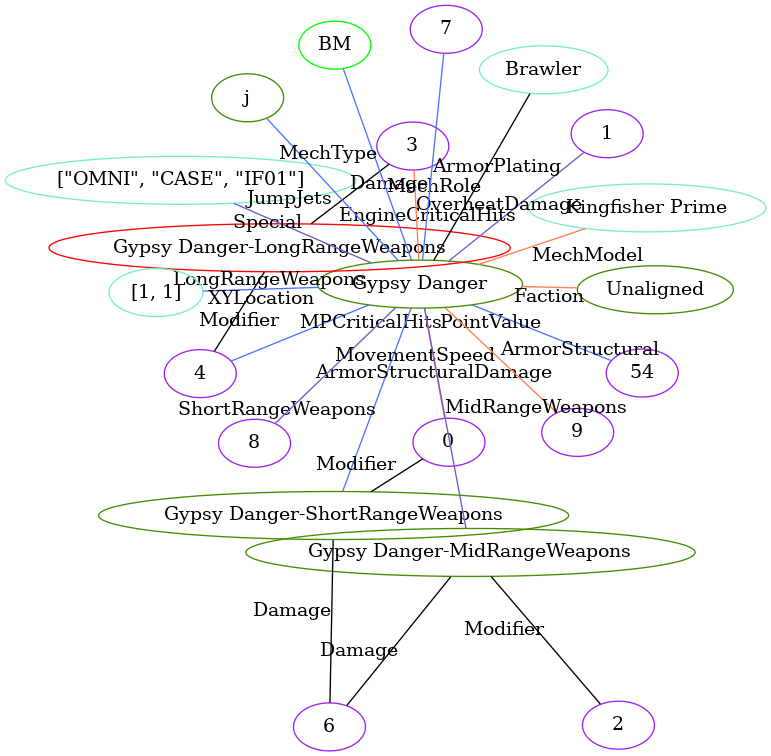

In [27]:
if __name__ == "__main__":
    from IPython.display import display

    qs.reset()
    MechFactories['Kingfisher Prime']("Gypsy Danger", "Foobar")
    Move.move(entity_id="Gypsy Danger", delta=[1, 1, 1])
    try:
        Move.move(entity_id="Gypsy Danger", delta=[15, 1, 1])
    except MovementSpeed.MovementSpeedViolation as msv:
        print(f"Received expected MSV: {msv}")
    display(qs.render())